# Análise de Pareto usando Dados da Olist do Kaggle

> Projeto de Análise de pareto usando BigQuery e Tableau
* toc: true
* branch: master
* badges: false
* comments: false
* author: brn
* categories: [jupyter]

## Proposta do Projeto

A análise de Pareto ou diagrama de Pareto é uma ferramenta muito conhecida e amplamente usada no mercado de trabalho com o fim de entender e elencar os produtos reponsaveis pela maior quantidade de fatura dentro de um recorte temporal. 

Nesse projeto pretendo usar os dados da Olist, [disponiveis no Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce), e construir toda a manipulação desses dados no [BigQuery](https://console.cloud.google.com/bigquery?sq=42305503569:c4f91ff79bf141f9bffbc384d1dfe20d), usando a opção gratuita da pltaforma chamada sandbox. 

Com o dataset devidamente lapidados, a representação grafica e o chamado diagrama de Pareto será plotado no Tableau e disponibilizado no site do [Tableau Public](https://public.tableau.com/app/profile/brncode/viz/AnalisedeParetodeVendedores-Olist/Pareto) 

O primeiro passo, é baixar o dataset e upar ele no BigQuery.
Após isso foi feita a query para a análise.

In [ ]:
'''WITH VENDAS AS (
                SELECT ROUND(SUM(Itens.price), 2) AS ValorVendas,
                    IFNULL(Produtos.product_category_name, 'Sem Categoria') AS Categoria

                FROM `polar-surfer-342122.Olist.OrderItems` AS Itens
                INNER JOIN `polar-surfer-342122.Olist.Products` AS Produtos 
                ON Itens.product_id = Produtos.product_id
                GROUP BY Categoria
                ORDER BY ValorVendas DESC
                )

SELECT Categoria, ValorVendas, 
        PercentualVendasAcumuladas,
        PercentualCategAcumulado
FROM (
        SELECT Categoria, ValorVendas, 
            SUM(ValorVendas) OVER() AS TotalVendas,
            SUM(ValorVendas) OVER(ORDER BY ValorVendas DESC) AS TotalVendasAcumuladas,
            ROUND((SUM(ValorVendas) OVER(ORDER BY ValorVendas DESC) / SUM(ValorVendas) 
            OVER())* 100, 2)  AS PercentualVendasAcumuladas,
            COUNT(Categoria) OVER() AS TotalCategorias,
            ROW_NUMBER() OVER(ORDER BY ValorVendas DESC) AS Qtd_Categ_Acumulado,
            ROUND((ROW_NUMBER() OVER(ORDER BY ValorVendas DESC) / COUNT(Categoria) 
            OVER()) * 100, 2) AS  PercentualCategAcumulado
        FROM VENDAS
    )'''

Sendo o resultado da query o seguinte:

In [11]:
#hide_input

import pandas as pd
pd.read_csv('/content/bquxjob_136fa643_1833781236a.csv')

,Categoria,ValorVendas,PercentualVendasAcumuladas,PercentualCategAcumulado
0,beleza_saude,1258681.34,9.26,1.35
1,relogios_presentes,1205005.68,18.13,2.70
2,cama_mesa_banho,1036988.68,25.76,4.05
3,esporte_lazer,988048.97,33.03,5.41
4,informatica_acessorios,911954.32,39.74,6.76
...,...,...,...,...
69,flores,1110.04,99.98,94.59
70,casa_conforto_2,760.27,99.99,95.95
71,cds_dvds_musicais,730.00,99.99,97.30
72,fashion_roupa_infanto_juvenil,569.85,100.00,98.65


Após baixar, organizar e plotar no Tableau o resultado é esse:

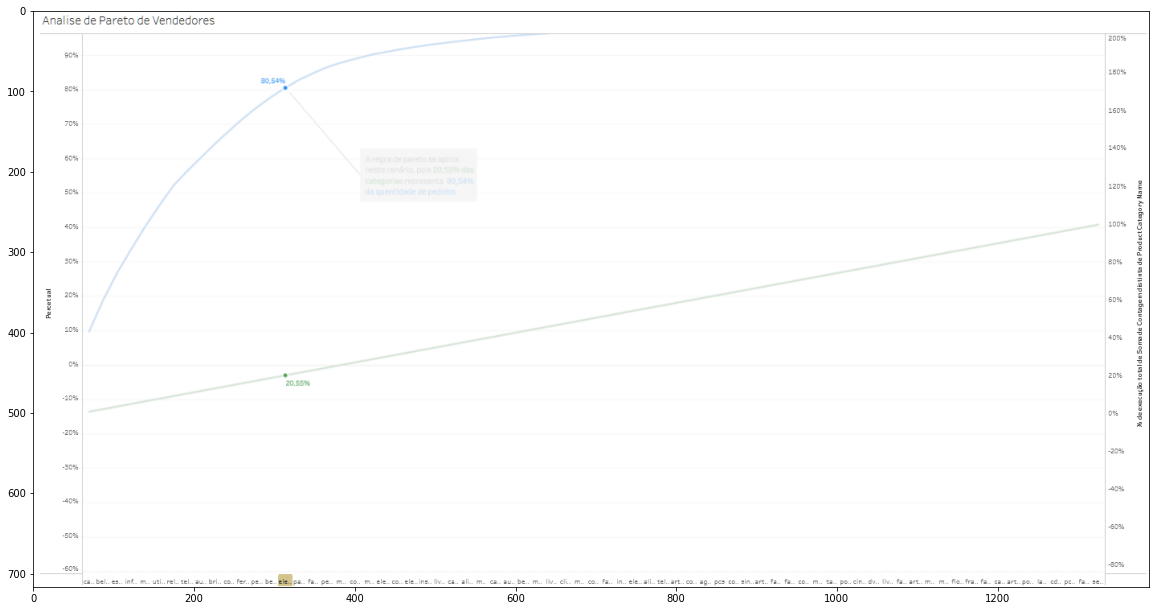

In [12]:
#hide_input

import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread("/content/Capturar.PNG")
plt.figure(figsize=(20,12))
plt.imshow(img, cmap='gray', vmin=0, vmax=255);

Também disponivel para ver com mais detalhes no [Tableau Public](https://public.tableau.com/app/profile/brncode/viz/AnalisedeParetodeVendedores-Olist/Pareto) 